In [9]:
import pickle
import os
import pickle
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.io import gbq
from google.cloud import bigquery
from google.oauth2 import service_account

%matplotlib inline
pd.set_option('display.max_colwidth', -1)
% config InlineBackend . figure_format = 'svg'

In [11]:
## Set up bigquery environment

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/songlin/CS 224W/project/Github224W-c6c2551f3816.json"
project_id = 'github224w'
client = bigquery.Client(project=project_id)
dataset_id = 'gh_data'
dataset_ref = client.dataset(dataset_id)
dataset = client.get_dataset(dataset_ref)

## Create a view for project commit times

In [ ]:
view_ref = dataset_ref.table('project_commit_times_view')
view = bigquery.Table(view_ref)

view.view_query = """
#standardSQL
SELECT
  project_id,
  COUNT(commit_id) AS commit_times
FROM
  `ghtorrent-bq:ght_2018_04_01.project_commits`
GROUP BY
  project_id
"""
view = client.create_table(view)

In [14]:
## Retrieve data from the view
query_job = client.query("""
SELECT
  commit_times,
  COUNT(project_id) AS project_counts
FROM
  `github224w.gh_data.project_commit_times_view`
GROUP BY
  commit_times
    """)

results = query_job.result()
project_commit_counts = results.to_dataframe()

In [17]:
project_commit_counts.sort_values(by='commit_times', inplace=True)

In [21]:
project_commit_counts

,commit_times,project_counts
41418,1,22937971
42219,2,8223927
41873,3,5039510
41540,4,3186556
41882,5,2371735
38496,6,1881634
37355,7,1507865
41348,8,1255023
41763,9,1086349
42093,10,921002


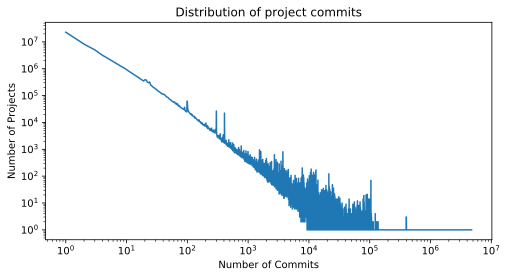

In [29]:
plt.figure(dpi=200, figsize=(8,4))
plt.plot(project_commit_counts['commit_times'], project_commit_counts['project_counts'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of Commits')
plt.ylabel('Number of Projects')
plt.title('Distribution of project commits');

In [30]:
project_commit_counts['perc']=project_commit_counts['project_counts']*1.0/sum(project_commit_counts['project_counts'])
project_commit_counts['cum_sum'] = project_commit_counts['perc'].cumsum()

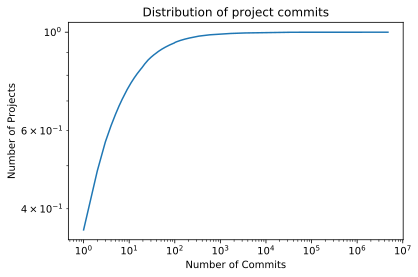

In [37]:
plt.plot(project_commit_counts['commit_times'], project_commit_counts['cum_sum'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of Commits')
plt.ylabel('Accumulative percentage of perojects')
plt.title('Accumulated percentage of project based on commits');